# Sprint18 データセット作成

# ライブラリのimport

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import optimizers
from keras.preprocessing.image import load_img, img_to_array
from PIL import Image
import numpy as np
import numpy  as np
import os
import glob 
import re
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline
import glob
import numpy as np

Using TensorFlow backend.


# 問題1 自作データセットでの分類の学習

+ このnotebookと同階層に、sprint18_imagesフォルダを作成
+ sprint18_imagesフォルダの中に、dogフォルダを作り、その中に、dog1.jpg～dog5.jpgの犬画像を配置
+ sprint18_imagesフォルダの中に、catフォルダを作り、その中に、cat1.jpg～cat5.jpgの犬画像を配置

sprint18_imagesディレクトリの中身

          dog
              dog1.jpg
              dog2.jpg
              ・・・・
          cat
              cat1.jpg
              cat2.jpg
              ・・・

In [2]:
# 基本的なグローバル変数を定義
EPOCHS = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [3]:
# 画像パス
image_path_list = glob.glob(r'sprint18_images\cat\*')+glob.glob(r'sprint18_images\dog\*')

# 説明変数と目的変数格納用変数
X = []
y = []

# 画像パスでループ
for image_path in image_path_list:
    # 正解ラベルを格納
    if image_path.find('dog')!=-1:
        y.append([0])
    else:
        y.append([1])
    # 画像データを格納
    image = load_img(image_path, grayscale=False, color_mode='rgb', target_size=(IMG_HEIGHT,IMG_WIDTH))
    image_array = img_to_array(image) / 255
    X.append(image_array)

# numpy配列化
X = np.array(X)
y = np.array(y)

In [4]:
# 配列の形確認
X.shape,y.shape

((10, 150, 150, 3), (10, 1))

In [5]:
# モデル定義
model = Sequential([
    Conv2D(16, 3, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
# コンパイル
model.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(lr=0.001), metrics=["accuracy"])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
# 学習
model.fit(X,y, epochs=EPOCHS)




Epoch 1/15





10/10 [==============================] - 1s 62ms/step - loss: 0.6875 - acc: 0.5000
Epoch 2/15
10/10 [==============================] - 0s 14ms/step - loss: 1.3997 - acc: 0.5000
Epoch 3/15
10/10 [==============================] - 0s 15ms/step - loss: 0.9122 - acc: 0.5000
Epoch 4/15
10/10 [==============================] - 0s 14ms/step - loss: 0.8272 - acc: 0.5000
Epoch 5/15
10/10 [==============================] - 0s 15ms/step - loss: 0.5783 - acc: 0.6000
Epoch 6/15
10/10 [==============================] - 0s 14ms/step - loss: 0.5835 - acc: 0.6000
Epoch 7/15
10/10 [==============================] - 0s 16ms/step - loss: 0.5784 - acc: 0.6000
Epoch 8/15
10/10 [==============================] - 0s 15ms/step - loss: 0.5178 - acc: 0.7000
Epoch 9/15
10/10 [==============================] - 0s 14ms/step - loss: 0.4586 - acc: 1.0000
Epoch 10/15
10/10 [==============================] - 0s 15ms/step - loss: 0.4286 - acc: 0.9000
Epoch 11/15
10/10 [==============================] 

In [7]:
# 予測
np.where(model.predict(X)<=0.5,1,0)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1]])

# 問題2　分類データセットに対するデータ拡張

KerasのImageDataGeneratorというデータ拡張機能を利用します。

https://keras.io/ja/preprocessing/image/

In [8]:
# ImageDataGeneratorのインスタンス化
image_generator = ImageDataGenerator(
    rescale=1./255,
    width_shift_range = 0.1
)

In [9]:
# ジェネレータ定義
gen_train = image_generator.flow_from_directory(
    batch_size=1,
    directory='./sprint18_images/',
    classes = ['dog', 'cat'],
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

Found 10 images belonging to 2 classes.


(1, 150, 150, 3) [0.]


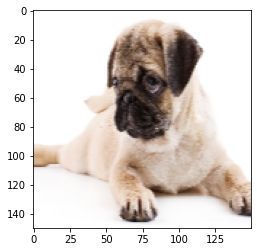

In [10]:
# 呼び出し確認
image, label = next(gen_train)

# shape確認
print(image.shape, label)

# 描画
plt.imshow(image[0])

In [11]:
# モデル定義
model = Sequential([
    Conv2D(16, 3, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
# コンパイル
model.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(lr=0.001), metrics=["accuracy"])

In [12]:
# 学習
model.fit_generator(generator=gen_train, epochs=EPOCHS ,steps_per_epoch=10)

Epoch 1/15
10/10 [==============================] - 2s 158ms/step - loss: 4.1647 - acc: 0.5000
Epoch 2/15
10/10 [==============================] - 1s 106ms/step - loss: 0.7879 - acc: 0.4000
Epoch 3/15
10/10 [==============================] - 1s 106ms/step - loss: 0.7460 - acc: 0.5000
Epoch 4/15
10/10 [==============================] - 1s 106ms/step - loss: 0.6849 - acc: 0.6000
Epoch 5/15
10/10 [==============================] - 1s 105ms/step - loss: 0.6396 - acc: 0.6000
Epoch 6/15
10/10 [==============================] - 1s 106ms/step - loss: 0.6742 - acc: 0.6000
Epoch 7/15
10/10 [==============================] - 1s 105ms/step - loss: 0.5366 - acc: 0.6000
Epoch 8/15
10/10 [==============================] - 1s 105ms/step - loss: 0.3666 - acc: 1.0000
Epoch 9/15
10/10 [==============================] - 1s 107ms/step - loss: 0.5249 - acc: 0.8000
Epoch 10/15
10/10 [==============================] - 1s 106ms/step - loss: 0.3546 - acc: 0.9000
Epoch 11/15
10/10 [==============================

In [13]:
# 予測
np.where(model.predict(X)<=0.5,1,0)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1]])

# 問題3　物体検出データセットの用意

In [14]:
# 基本的なグローバル変数を定義
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

In [91]:
## BBoxを描画する関数の定義
def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    """BBox描画
    Parameters
    -------------
    img : 画像
    bbox : BBox座標
    class_id : クラスラベル
    class_idx_to_name : クラスラベルの名前
    color=BOX_COLOR : BBoxの線色
    thickness : BBoxの線太さ
    """
    x_min, y_min, x_max,  y_max = bbox
    x_min, y_min, x_max,  y_max = int(x_min), int(y_min), int(x_max),  int(y_max)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.3, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.3,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img

def visualize(annotations, category_id_to_name):
    """複数のBBoxにも対応できる関数
    Parameters
    ----------------
    annotations : 画像とBBoxの情報
    category_id_to_name : クラスラベルとクラスラベルの名前
    """
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(7, 7))
    plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


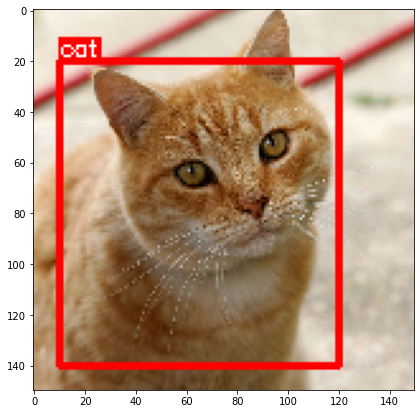

In [41]:
annotations = {'image': X[0], 'bboxes': [[10,20,120,140]], 'category_id': y[0]}
img = visualize(annotations,{0: 'dog', 1: 'cat'})

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


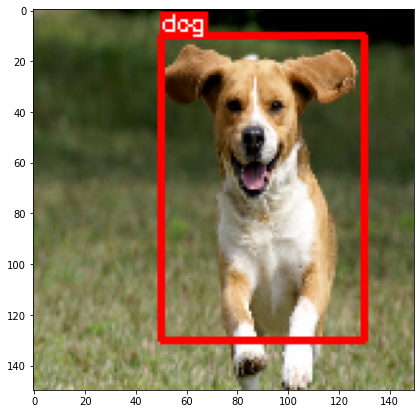

In [42]:
annotations = {'image': X[5], 'bboxes': [[50,10,130,130]], 'category_id': y[5]}
img = visualize(annotations,{0: 'dog', 1: 'cat'})

# 問題4　物体検出データセットに対するデータ拡張

albumentationsというデータ拡張ライブラリを使用する

In [102]:
# ライブラリの読み込み
import albumentations as A

In [103]:
# albumentations用にピクセル数を画像に対する割合に変更
annotations = {'image': X[5], 'bboxes': [[50/IMG_WIDTH,10/IMG_HEIGHT,130/IMG_WIDTH,130/IMG_HEIGHT]], 'category_id': y[5]}

In [104]:
# データ拡張
aug = A.Compose([
    A.RandomCrop(width=100, height=100),
    A.RandomBrightnessContrast(p=0.2),
], bbox_params=A.BboxParams(format='albumentations',label_fields=['category_id']))
augmented = aug(**annotations)

In [105]:
# 拡張後も割合で帰ってくるので、描画用に元に戻す
augmented['bboxes'] = [[
    augmented['bboxes'][0][0]*augmented['image'].shape[0],
    augmented['bboxes'][0][1]*augmented['image'].shape[1],
    augmented['bboxes'][0][2]*augmented['image'].shape[0],
    augmented['bboxes'][0][3]*augmented['image'].shape[1]
]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


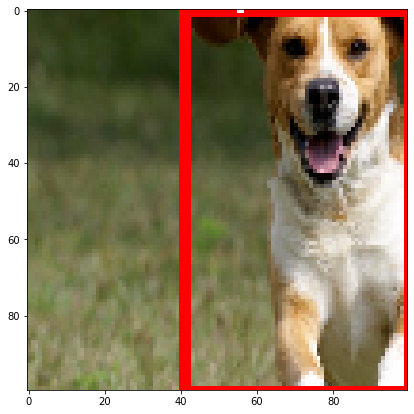

In [106]:
# 描画
visualize(augmented,{0: 'dog', 1: 'cat'})